# **Ejercicios de pair programming Módulo 2 - Sprint 2**
## **Limpieza I. Introducción**
---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

En este ejercicio trabajaremos con un `csv` nuevo. En concreto trabajaremos con datos de banca/marketing. Este conjunto de datos contiene información sobre campañas de marketing bancario, incluyendo detalles como la edad, el trabajo, el estado civil, etc. En concreto estos datos son de una campaña de marketing para la venta de un producto o servicio, la columna ("y") parece indicar si el cliente ha aceptado la oferta o no.  

Tenemos distintos tipos de variables en el dataset, veamos que significan:  

**Datos del cliente bancario:**  

- `age`: (numérico)  
- `job`: tipo de trabajo (categórico: "administrativo", "obrero", "empresario", "empleada del hogar", "directivo", "jubilado", "autónomo", "servicios", "estudiante", "técnico", "desempleado")  
- `marital`: estado civil (categórico: "divorciado", "casado", "soltero". Nota: "divorciado" significa divorciado o viudo)  
- `education`: (categórica: "básica.4a", "básica.6a", "básica.9a", "secundaria", "analfabeto", "curso.profesional", "título.universitario")  
- `default`: ¿tiene crédito en mora? (categórico: O: "no", 1: "sí")  
- `housing`: ¿tiene préstamo para vivienda? (categórico: 0: "no", 1: "sí")  
- `loan`: ¿tiene préstamo personal? (categórico: 0: "no", 1: "sí")  

**Datos relacionados con el último contacto de la campaña actual:**  

- `contact`: tipo de comunicación del contacto (categórico: "móvil", "teléfono")  
- `month_day_week`: lista con el año del último contacto (categórico: "ene", "feb", "mar", ..., "nov", "dic") y el día de la semana del último contacto (categorical: "mon", "tue", "wed", "thu", "fri")  
- `duration`: duración del último contacto, en segundos (numérico). Nota importante: este atributo afecta en gran medida al objetivo de salida (por ejemplo, si duration=0 entonces y="no"). Sin embargo, la duración no se conoce antes de realizar una llamada. Además, es obvio que y se conoce una vez finalizada la llamada. Por lo tanto, esta entrada sólo debería incluirse a efectos de evaluación comparativa y debería descartarse si la intención es tener un modelo predictivo realista.    

**Otras variables:**  

- `campaign`: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)  
- `pdays`: número de días transcurridos desde que el cliente fue contactado por última vez en una campaña anterior (numérico; 999 significa que el cliente no fue contactado previamente)  
- `previous`: número de contactos realizados antes de esta campaña y para este cliente (numérico)  
- `poutcome`: resultado de la campaña de marketing anterior (categórico: "fracaso", "inexistente", "éxito")  
- `y`: ¿ha suscrito el cliente un depósito a plazo? (binario: "sí", "no")    

**Variables de contexto social y económico:**  

- `emp.var.rate`: tasa de variación del empleo - indicador trimestral (numérico)  
- `cons.price.idx`: índice de precios al consumidor - indicador mensual (numérico)  
- `cons.conf.idx`: índice de confianza del consumidor - indicador mensual (numérico)  
- `euribor3m`: tipo euribor a 3 meses - indicador diario (numérico)  
- `nr.employed`: número de empleados - indicador trimestral (numérico)  

### **Hipótesis**  

1. La edad, el trabajo, el estado civil, la educación, la situación de deuda y la forma de contacto pueden influir en la probabilidad de que un cliente acepte la oferta.  
2. El número de veces que se ha contactado a un cliente en el pasado (campo `campaign`), el número de días que han pasado desde el último contacto (campo `pdays`), y el resultado de la campaña anterior (campo `poutcome`) pueden afectar la respuesta del cliente a una nueva oferta.  
3. Las variables económicas (tales como el índice de precios al consumidor (`cons.price.idx`), la tasa de variación del empleo (`emp.var.rate`), etc.) pueden influir en la probabilidad de que un cliente acepte la oferta.  
4. Los clientes que ya tienen una hipoteca (`housing`) o un préstamo (`loan`) pueden ser menos propensos a aceptar una nueva oferta, ya que podrían estar limitados financieramente.  

Entre las tareas que tendréis que hacer hoy:    

1. Explora el dataset con los métodos que hemos ido aprendiendo hasta ahora para familiarizarnos con los datos.  

In [4]:
# cargamos el dataset
df = pd.read_csv('../datos/bank-additional-full.csv', index_col=0)
df.head(2)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,month_day_week
0,56,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"
1,57,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857","5191,0",no,"['may', 'mon']"


In [5]:
print(f'A continuación mostramos el porcentaje de nulos para las columnas \n{df.isnull().sum()/df.shape[0]*100}')

A continuación mostramos el porcentaje de nulos para las columnas 
age                0.000000
job                0.803799
marital            0.196896
education          4.204309
default           20.884874
housing            2.388233
loan               2.388233
contact            0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
month_day_week     0.000000
dtype: float64


In [6]:
print('A continuación mostramos algunos datos geneales del dataframe:')
df.info()

A continuación mostramos algunos datos geneales del dataframe:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43170 entries, 0 to 29612
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43170 non-null  int64  
 1   job             42823 non-null  object 
 2   marital         43085 non-null  object 
 3   education       41355 non-null  object 
 4   default         34154 non-null  float64
 5   housing         42139 non-null  float64
 6   loan            42139 non-null  float64
 7   contact         43170 non-null  object 
 8   duration        43170 non-null  int64  
 9   campaign        43170 non-null  int64  
 10  pdays           43170 non-null  int64  
 11  previous        43170 non-null  int64  
 12  poutcome        43170 non-null  object 
 13  emp.var.rate    43170 non-null  float64
 14  cons.price.idx  43170 non-null  object 
 15  cons.conf.idx   43170 non-null  object 
 16  euribor3m    

In [7]:
print('A continuación mostramos los principales estadísticos de las variables numéricas:')
df.describe().T

A continuación mostramos los principales estadísticos de las variables numéricas:


,count,mean,std,min,25%,50%,75%,max
age,43170.0,40.014918,10.407327,17.0,32.0,38.0,47.0,98.0
default,34154.0,0.000088,0.009372,0.0,0.0,0.0,0.0,1.0
housing,42139.0,0.535869,0.498718,0.0,0.0,1.0,1.0,1.0
loan,42139.0,0.155652,0.362529,0.0,0.0,0.0,0.0,1.0
duration,43170.0,257.883739,259.393738,0.0,102.0,179.0,319.0,4918.0
campaign,43170.0,2.564675,2.768538,1.0,1.0,2.0,3.0,56.0
pdays,43170.0,962.452282,186.962379,0.0,999.0,999.0,999.0,999.0
previous,43170.0,0.173639,0.496750,0.0,0.0,0.0,0.0,7.0
emp.var.rate,43170.0,0.078177,1.572217,-3.4,-1.8,1.1,1.4,1.4


In [8]:
print('A continuación mostramos los principales estadísticos de las variables categóricas:')
df.describe(include='object').T

A continuación mostramos los principales estadísticos de las variables categóricas:


,count,unique,top,freq
job,42823,11,admin.,10918
marital,43085,3,MARRIED,26105
education,41355,7,university.degree,12766
contact,43170,2,cellular,27438
poutcome,43170,3,NONEXISTENT,37261
cons.price.idx,43170,26,"93,994",8117
cons.conf.idx,43170,26,"-36,4",8117
euribor3m,43170,316,"4,857",3002
nr.employed,43170,11,"5228,1",16981
y,43170,2,no,38308


2. Cambia el nombre de las columnas para que no tengan puntos en el nombre. En concreto, reemplazad los "." por comas.  

In [9]:
col_new = {col :  col.replace('.', ',') for col in df.columns}
df.rename(columns = col_new, inplace = True)
df.sample()


,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week
21534,31,admin.,DIVORCED,university.degree,0.0,1.0,0.0,cellular,90,2,999,0,NONEXISTENT,1.4,"93,444","-36,1","4,963","5228,1",no,"['aug', 'tue']"


3. ¿Hay valores duplicados en nuestro dataframe? En caso de que los haya, eliminándlos.  

In [10]:
df.duplicated().sum()

1994

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

4. Como hemos visto, algunas columnas no tienen el tipo de datos que deberían. Cambiad el tipo de dato para las columnas de `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`.

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp,var,rate', 'cons,price,idx', 'cons,conf,idx', 'euribor3m',
       'nr,employed', 'y', 'month_day_week'],
      dtype='object')

In [13]:
# cambiamos el separador de decimales de ',' a '.'
df[['cons,price,idx', 'cons,conf,idx', 'euribor3m']] = df[['cons,price,idx', 'cons,conf,idx', 'euribor3m']].replace(r',', '.', regex=True)
df.sample()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week
12592,50,NaN,MARRIED,basic.4y,NaN,1.0,0.0,cellular,511,3,999,0,NONEXISTENT,1.4,93.918,-42.7,4.96,"5228,1",no,"['jul', 'mon']"


In [14]:
# cambiamos el tipo de dato
df[['cons,price,idx', 'cons,conf,idx', 'euribor3m']] = df[['cons,price,idx', 'cons,conf,idx', 'euribor3m']].astype('float64', copy=True, errors='raise') 
df.dtypes

age                 int64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp,var,rate      float64
cons,price,idx    float64
cons,conf,idx     float64
euribor3m         float64
nr,employed        object
y                  object
month_day_week     object
dtype: object

5. En las columnas de `marital` y `month`, poner todos los valores en minúsculas.  
    💡 **Pista** Podréis usar una función o una `lambda` 💡

In [15]:
# obtenemos los valores únicos de la columna 'month_day_week' y vemos que ya está en minúsculas así que no hace falta tratarla
df['month_day_week'].unique()

array(["['may', 'mon']", "['may', 'tue']", "['may', 'wed']",
       "['may', 'thu']", "['may', 'fri']", "['jun', 'mon']",
       "['jun', 'tue']", "['jun', 'wed']", "['jun', 'thu']",
       "['jun', 'fri']", "['jul', 'tue']", "['jul', 'wed']",
       "['jul', 'thu']", "['jul', 'fri']", "['jul', 'mon']",
       "['aug', 'mon']", "['aug', 'tue']", "['aug', 'wed']",
       "['aug', 'thu']", "['aug', 'fri']", "['oct', 'fri']",
       "['oct', 'mon']", "['oct', 'tue']", "['oct', 'wed']",
       "['oct', 'thu']", "['nov', 'mon']", "['nov', 'tue']",
       "['nov', 'wed']", "['nov', 'thu']", "['nov', 'fri']",
       "['dec', 'mon']", "['dec', 'wed']", "['dec', 'thu']",
       "['dec', 'fri']", "['dec', 'tue']", "['mar', 'mon']",
       "['mar', 'tue']", "['mar', 'wed']", "['mar', 'thu']",
       "['mar', 'fri']", "['apr', 'wed']", "['apr', 'thu']",
       "['apr', 'fri']", "['apr', 'mon']", "['apr', 'tue']",
       "['sep', 'tue']", "['sep', 'wed']", "['sep', 'thu']",
       "['sep', 'fri']",

In [16]:
# pasamos a minúcuclas la columna 'marital'
df['marital'] = df['marital'].apply(lambda parametro: parametro.lower() if type(parametro) == str else np.nan)
df.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,"5191,0",no,"['may', 'mon']"
1,57,services,married,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,"5191,0",no,"['may', 'mon']"
2,37,services,married,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,"5191,0",no,"['may', 'mon']"
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,"5191,0",no,"['may', 'mon']"
4,56,services,married,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,4.857,"5191,0",no,"['may', 'mon']"


6. Para no olvidarnos de la visualización. A través de la visualización, podemos detectar errores, valores atípicos, valores faltantes y otros problemas comunes en los datos que de otra manera podrían ser difíciles de identificar. Para esto vamos a hacer una serie de gráficas que deberán ser incluidas en un subplot. Estas gráficas tienen que ser:  
    - Una gráfica donde podamos ver si el tipo de trabajo afecta a que un cliente acepte la oferta.  
    - Una gráfica donde podamos ver si el hecho de que un cliente tenga una hipoteca afecta a que acepte la oferta.  
    - Una gráfica donde podamos ver si el hecho de que un cliente tenga un prestamo afecta a que acepte la oferta.  
    - Una gráfica donde podamos ver si hay una relación entre el numero de días desde el último contacto afecta a que un cliente acepte la oferta  
    - Una gráfica donde podamos ver si hay relación entre el resultado de la campaña anterior y si el cliente afecta a que el cliente acepte la oferta.  

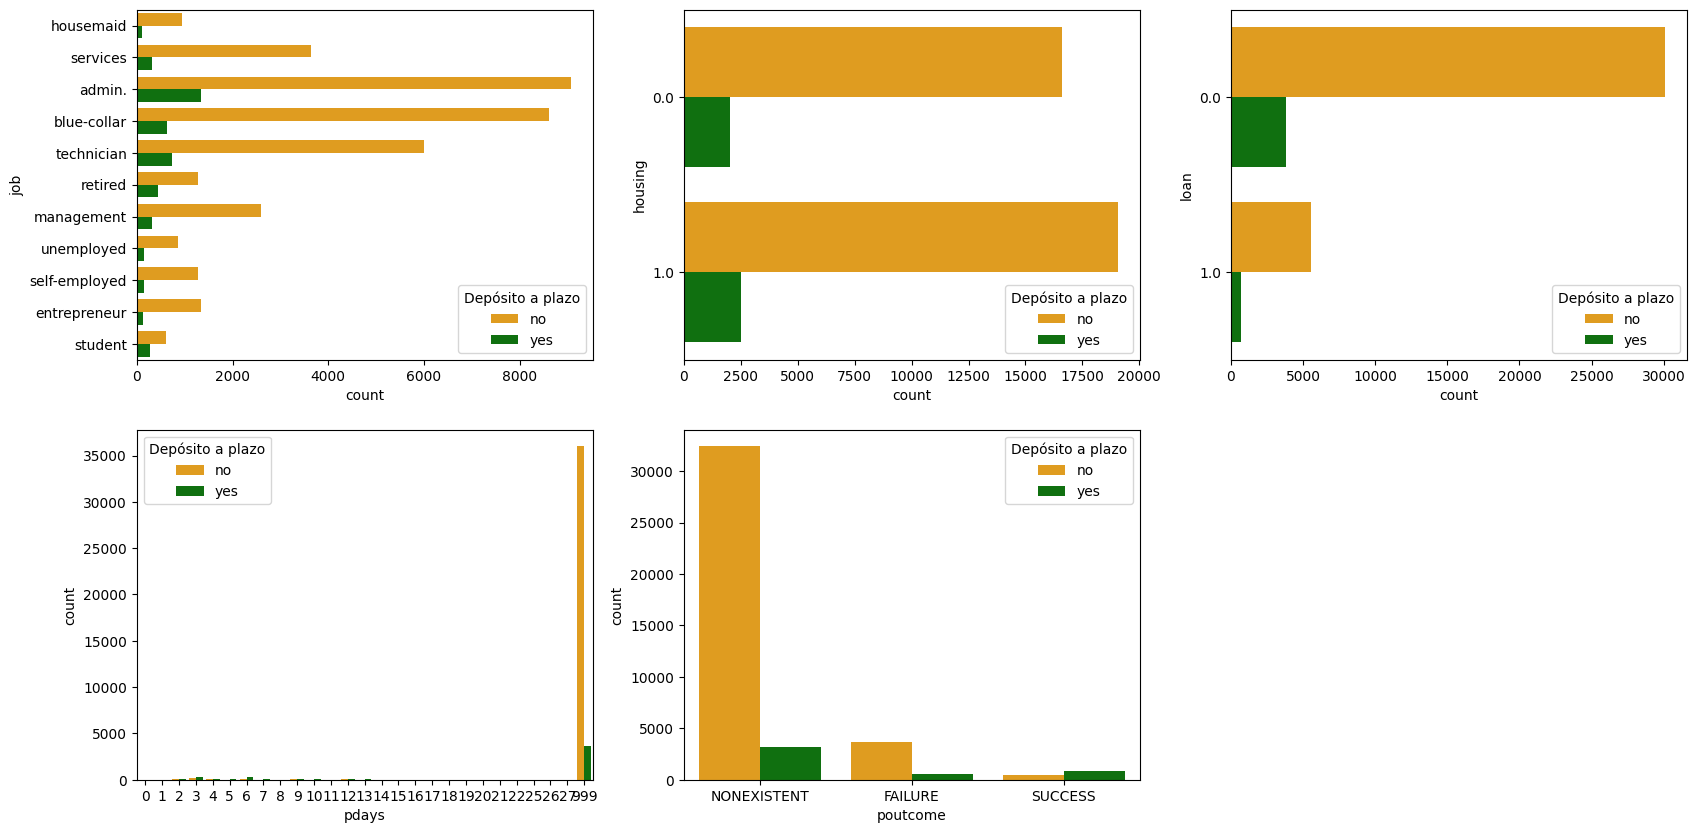

In [29]:
fig, axes = plt.subplots(2,3, figsize=(20, 10))

sns.countplot(y=df['job'], data=df, hue=df['y'], palette=['orange', 'green'], ax=axes[0][0])
sns.countplot(y=df['housing'], data=df, hue=df['y'], palette=['orange', 'green'], ax=axes[0][1])
sns.countplot(y=df['loan'], data=df, hue=df['y'], palette=['orange', 'green'], ax=axes[0][2])
#sns.scatterplot(x=df['pdays'], data=df, hue=df['y'], ax=axes[1][0])
#sns.barplot(x=df['y'], y=df['pdays'], palette=['orange', 'green'], ax=axes[1][0])
sns.countplot(x=df['pdays'], data=df, hue=df['y'], palette=['orange', 'green'], ax=axes[1][0])
sns.countplot(x=df['poutcome'], data=df, hue=df['y'], palette=['orange', 'green'], ax=axes[1][1])

axes[0][0].legend(title='Depósito a plazo')
axes[0][1].legend(title='Depósito a plazo')
axes[0][2].legend(title='Depósito a plazo')
axes[1][0].legend(title='Depósito a plazo')
axes[1][1].legend(title='Depósito a plazo')

#sns.ylim(0,1000)

axes[1][2].axis('off') # quita el sexto subplot

plt.show()

7. Guardamos el csv para seguir trabajando en el siguiente ejercicio de pair de limpieza.  

In [23]:
df.to_csv('../datos/bank-additional-full2.csv')